In [23]:
%load_ext kedro.ipython

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [24]:
catalog


{'Mental_Health_Dataset': "kedro_datasets.pandas.csv_dataset.CSVDataset(filepath=PurePosixPath('C:/Users/jampu/OneDrive/Desktop/salud_mental/psicologia/data/01_raw/Mental_Health_Dataset.csv'), "
                          "protocol='file', load_args={}, save_args={'index': "
                          'False})',
 'parameters': "kedro.io.memory_dataset.MemoryDataset(data='<dict>')",
 'params:model_options': "kedro.io.memory_dataset.MemoryDataset(data='<dict>')",
 'params:model_options.test_size': "kedro.io.memory_dataset.MemoryDataset(data='<float>')",
 'params:model_options.random_state': "kedro.io.memory_dataset.MemoryDataset(data='<int>')",
 'params:model_options.features': "kedro.io.memory_dataset.MemoryDataset(data='<list>')"}

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
###%reload_kedro

In [26]:
df=catalog.load("Mental_Health_Dataset")
df.head()

[09/02/24 15:40:17] INFO     Loading data from Mental_Health_Dataset (CSVDataset)...            ]8;id=202078;file://C:\Users\jampu\OneDrive\Desktop\salud_mental\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=389585;file://C:\Users\jampu\OneDrive\Desktop\salud_mental\venv\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:29:31,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,2014-08-27 11:31:50,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,2014-08-27 11:32:39,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [27]:
num_rows, num_columns = df.shape
# Mostrar el resultado
print(f"El dataset tiene {num_columns} columnas y {num_rows} filas.")

El dataset tiene 17 columnas y 292364 filas.


In [28]:
df.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,734,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,2014-08-27 12:31:41,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,780,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


In [29]:
df.dtypes #tipo de datos de todas las columnas


Timestamp                  object
Gender                     object
Country                    object
Occupation                 object
self_employed              object
family_history             object
treatment                  object
Days_Indoors               object
Growing_Stress             object
Changes_Habits             object
Mental_Health_History      object
Mood_Swings                object
Coping_Struggles           object
Work_Interest              object
Social_Weakness            object
mental_health_interview    object
care_options               object
dtype: object

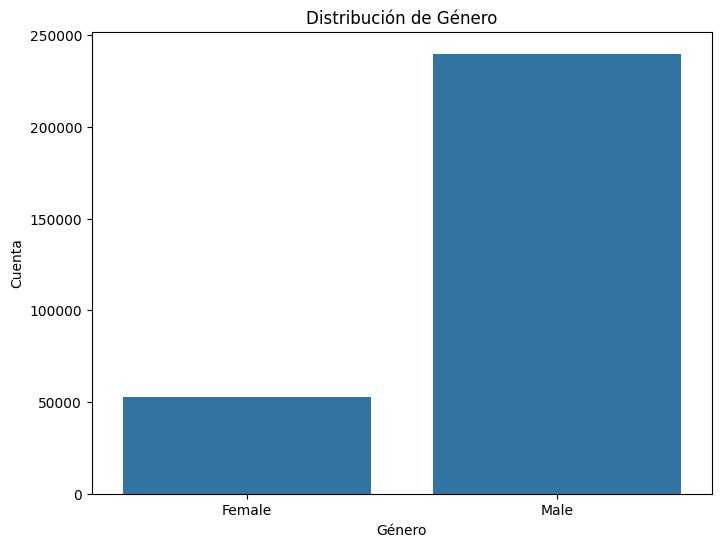

In [30]:
# Gráfico de barras para la distribución de género
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender')
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Cuenta')
plt.show()

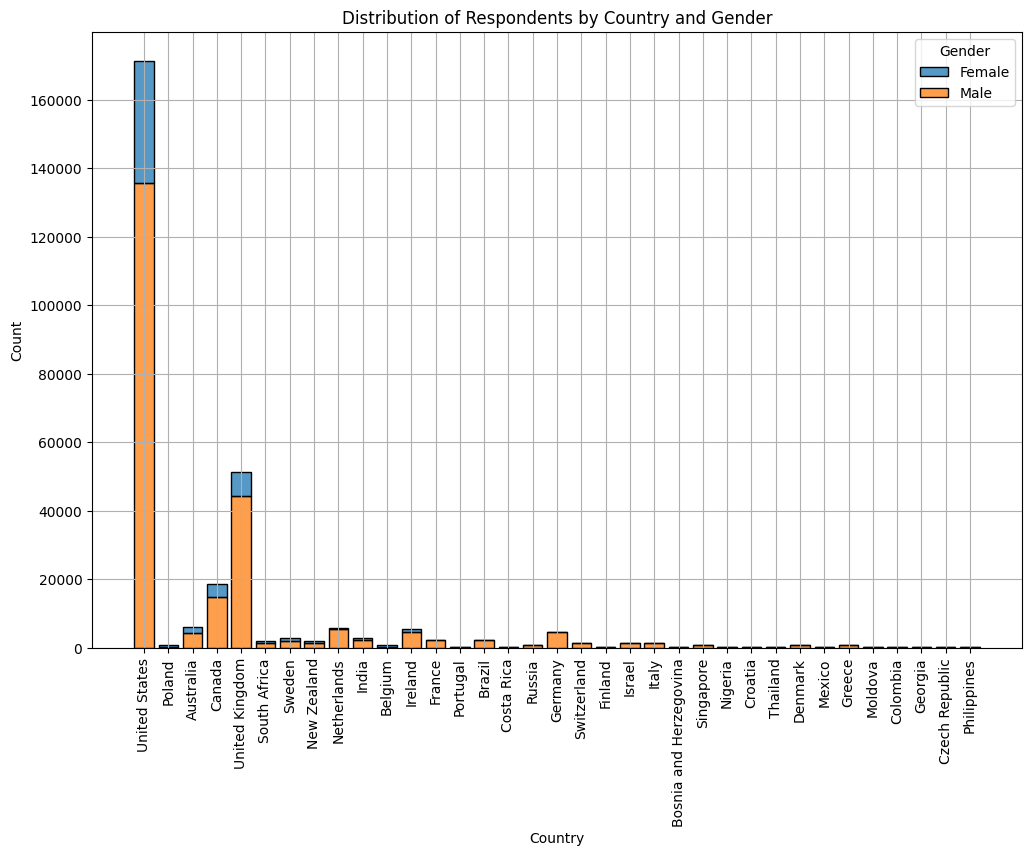

In [32]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Country', hue='Gender', multiple='stack', shrink=0.8)
plt.title('Distribution of Respondents by Country and Gender')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

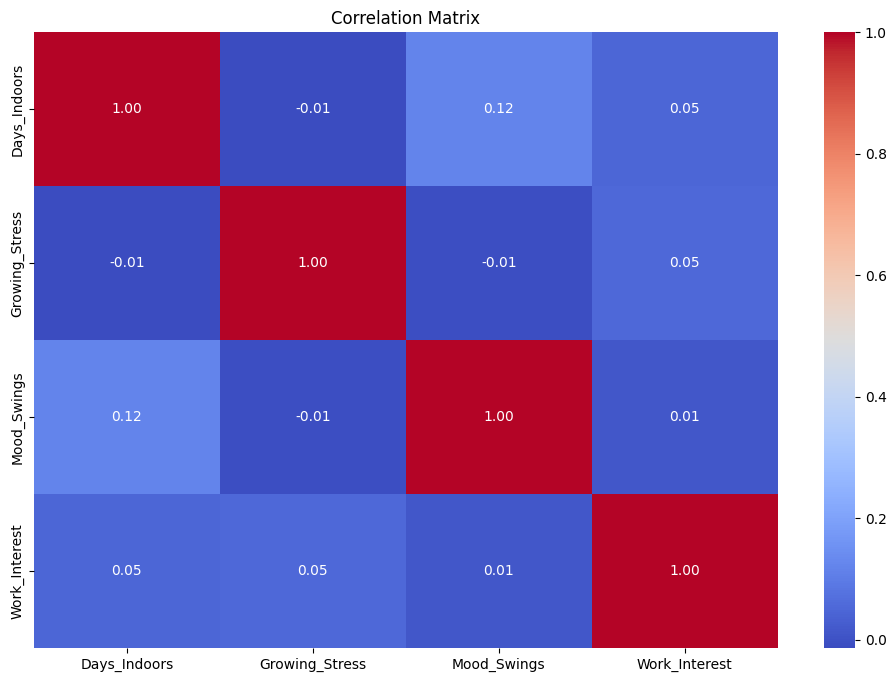

In [31]:
# Convertir columnas relevantes a valores numéricos (si aún no se ha hecho)
df['Days_Indoors'] = df['Days_Indoors'].map({'1-14 days': 1, '15-30 days': 2, 'More than 30 days': 3})
df['Growing_Stress'] = df['Growing_Stress'].map({'Yes': 1, 'No': 0})
df['Mood_Swings'] = df['Mood_Swings'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Work_Interest'] = df['Work_Interest'].map({'No': 0, 'Maybe': 1, 'Yes': 2})

# Calcular la matriz de correlación
correlation_matrix = df.corr(numeric_only=True)

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
